This notebook visualizes Q-values per action as heatmaps, making the agent's learned strategy interpretable.

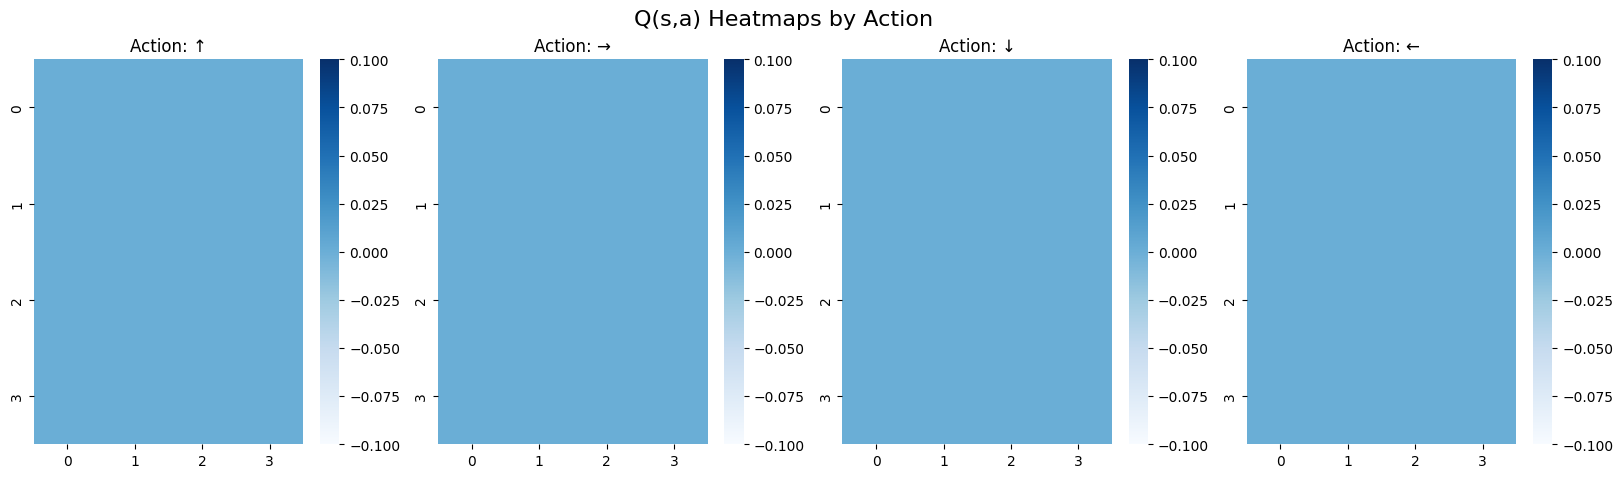

In [1]:
# notebooks/q_heatmaps.ipynb

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load saved Q-table (assuming it's saved with pickle in train_mc.py)
with open("../logs/q_table.pkl", "rb") as f:
    Q = pickle.load(f)

grid_size = int(np.sqrt(len(Q)))  # assume square gridworld
actions = ["↑", "→", "↓", "←"]

def plot_state_heatmaps(Q, grid_size):
    fig, axs = plt.subplots(1, len(actions), figsize=(20, 5))
    for a, action_name in enumerate(actions):
        q_values = [Q.get((s, a), 0) for s in range(grid_size * grid_size)]
        q_grid = np.array(q_values).reshape(grid_size, grid_size)
        sns.heatmap(q_grid, annot=False, cmap="Blues", ax=axs[a], cbar=True)
        axs[a].set_title(f"Action: {action_name}")
    plt.suptitle("Q(s,a) Heatmaps by Action", fontsize=16)
    plt.show()

plot_state_heatmaps(Q, grid_size)
